In [2]:
import matplotlib.pyplot as plt
import networkx as nx

In [3]:
def mediante(r1, r2):
    return tuple(map(sum, zip(r1, r2)))

def sternGraph(n):
    u = [(0, 1), (1, 1), (1, 0)]
    G = nx.Graph()
    G.add_nodes_from([-2, -1, 0])
    G.add_edges_from([(-2, 0), (-1, 0)])
    i = 1
    pos = {-2: [-2 ** (n - 1), 1], -1: [3 * 2 ** (n - 1), 1], 0: [2 ** (n - 1), 0]}
    labels = {-2: r'$\frac{0}{1}$', -1: r'$\frac{1}{0}$', 0: r'$\frac{1}{1}$'}
    for k in range(n):
        v = [mediante(r1, r2) for (r1, r2) in zip(u[1:], u[:-1])]
        G.add_nodes_from(range(i, i + len(v)))
        for x in range(len(v)):
            pos[i + x] = [-2 ** (n - 1) + (2 * x + 1) * 2 ** (n - k - 1), -k - 1]
            labels[i + x] = r'$\frac{' + str(v[x][0]) + '}{' + str(v[x][1]) + '}$'
        G.add_edges_from([(j, (j - 1) // 2) for j in range(i, i + len(v))])
        i += len(v)
        w = [None] * (len(u) + len(v))
        w[::2] = u
        w[1::2] = v
        u = w
    return G, pos, labels

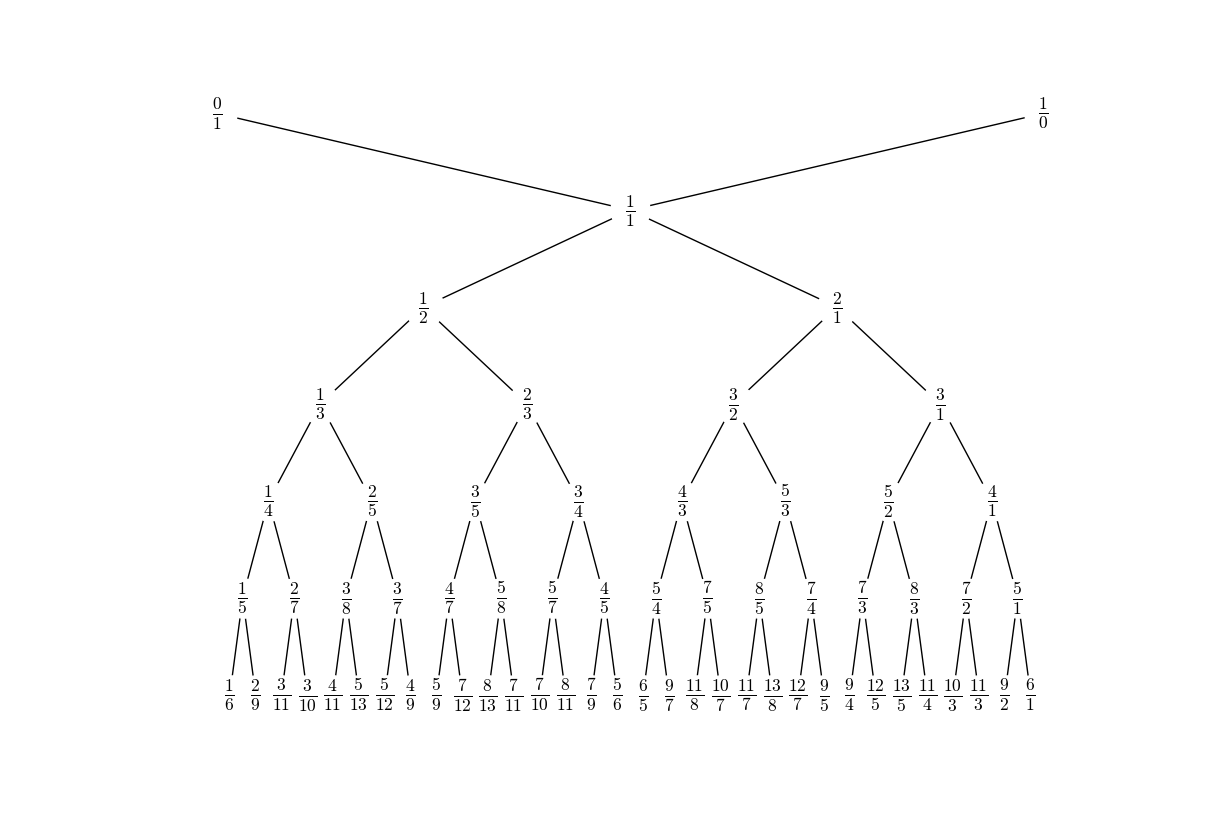

In [16]:
plt.figure(figsize=(15, 10))
plt.axis('off')
G, pos, labels = sternGraph(5)
nodes = nx.draw_networkx_nodes(G, pos,node_size=800,node_color='w')
nodes.set_edgecolor('w')
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos, labels, font_size=18)
plt.show()
